In [2]:
import numpy as np 
import itertools 
import os, pickle, json
import json 
from sklearn.linear_model import LogisticRegression
from PIL import Image
from torchvision import transforms
import torchvision.models as models
import torch, torch.nn as nn
from sklearn import svm

In [3]:
pwd 

'/Users/biota/working/faces'

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

In [24]:
ipath = '/Users/biota/working/faces/experiment_images/'
stimulus_files = [i for i in os.listdir(ipath) if 'png' in i if 'Julia' not in i]
objects = np.unique( [i[:5] for i in stimulus_files] )

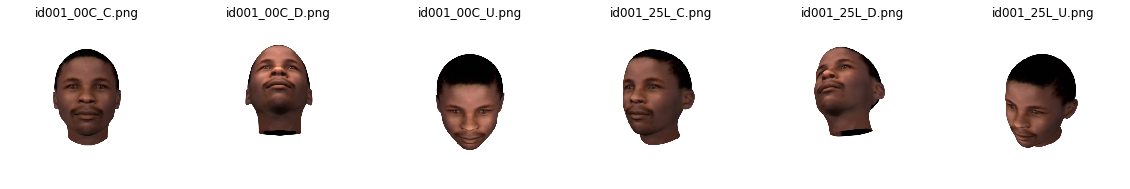

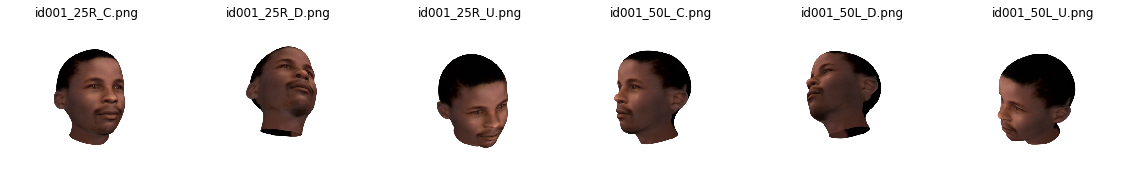

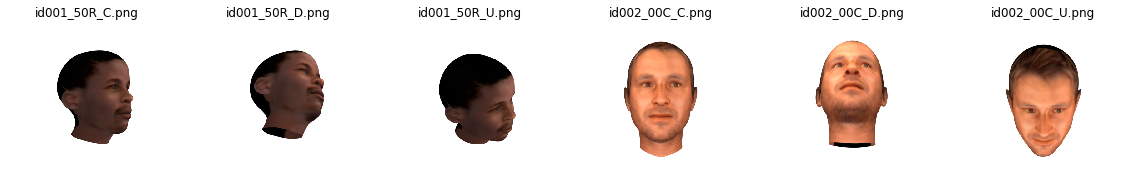

In [7]:
for I in range(3): 
    plt.figure(figsize=[20,4]); ii = 1 
    for i_file in np.sort( stimulus_files )[(I*6)+0:(I*6)+6]: 
        plt.subplot(1, 6, ii); ii += 1 
        filename = os.path.join(ipath, i_file)
        input_image = Image.fromarray(np.array(Image.open(filename))) #[:,:,:3])
        plt.imshow( input_image )
        plt.title(i_file)
        plt.axis('off')

In [8]:
import torch
import torch.nn as nn
from torchvision import models

In [9]:
preprocess = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [1]:
model_responses = {'trained':{} , 'untrained':{}} 

for i_model in model_responses: 
    
    model = models.resnet18(pretrained=[False, True][i_model == 'trained'])
    model = nn.Sequential(*list(model.children())[:-2])

    print( i_model, end='.')
    for i_file in stimulus_files: 
        
        print( i_file, end='.')
        
        filename = os.path.join(ipath, i_file)
        input_image = Image.fromarray(np.array(Image.open(filename))[:,:,:3])
        input_tensor = preprocess(input_image).unsqueeze(0)

        with torch.no_grad():
            model_responses[i_model][i_file] = np.array(model(input_tensor).detach().flatten())

## naive visualization

Text(0.5, 1.05, 'pairwise correlation between faces\nonly using the canonical (frontal) viewpoint')

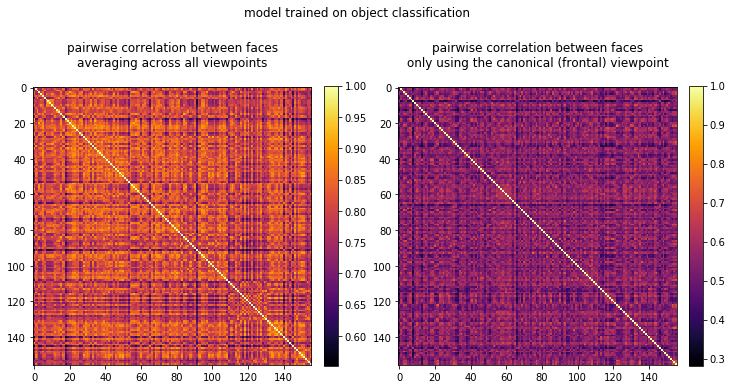

In [29]:
patterns = model_responses['trained']
object_responses = [np.mean([patterns[i] for i in stimulus_files if I in i], 0) for I in np.sort(objects)] 
i_view = '00C_C'
view_responses = [patterns[i] for i in stimulus_files if i_view in i]

plt.figure(figsize=[12,6])

plt.subplot(121)
plt.suptitle('model trained on object classification', y=1.01);
RDM = plt.imshow( np.corrcoef( object_responses ), cmap='inferno') ; 
#plt.yticks(range(len(objects)), objects);  
plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM,fraction=0.046, pad=0.04)
#plt.xticks(range(len(objects)), objects, rotation=90);  
plt.title('pairwise correlation between faces\naveraging across all viewpoints', y=1.05)

plt.subplot(122)
RDM = plt.imshow( np.corrcoef( view_responses ), cmap='inferno') ; 
#plt.yticks([]);  
#plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM,fraction=0.046, pad=0.04)
#plt.xticks(range(len(objects)), objects, rotation=90);  
plt.title('pairwise correlation between faces\nonly using the canonical (frontal) viewpoint', y=1.05)

In [157]:
import pandas 
metadata = pandas.read_csv('faces_from_drive/muct_notes.csv')

In [2]:
race_grouped_ids = metadata.groupby(('race_guess', 'muct_id')).sum().id.values
gender_grouped_ids = metadata.groupby(('gender_guess', 'muct_id')).sum().id.values

In [169]:
patterns = model_responses['trained']

In [3]:
race_grouping = np.array( ['id%003d'%i for i in race_grouped_ids] ) 
object_responses = {I: np.mean([patterns[i] for i in stimulus_files if I in i], 0) for I in race_grouping} 

In [242]:
import json

with open('meta_task.js', 'r') as f:
    tmp_data = json.load(f)

In [243]:
matadata_keys = ['lighting', 'race_guess', 'gender_guess', 'quality', 'muct_id', 
                 'quality_eyes', 'quality_mouth', 'quality_ears','quality_hair', 
                 'quality_neck','facial_hair', 'notes'] 

In [244]:
metadata = pandas.DataFrame({})

In [245]:
for i_id in list(tmp_data): 
    i_data = {i:tmp_data[i_id][i] for i in matadata_keys}
    i_data['id'] = i_id
    metadata= metadata.append(i_data, ignore_index=True)

In [4]:
race_grouped_ids = metadata.groupby(('race_guess', 'muct_id')).sum().id.values
gender_grouped_ids = metadata.groupby(('gender_guess', 'muct_id')).sum().id.values

In [5]:
metadata.groupby(('race_guess', 'muct_id')).sum()

Text(0.5, 1.05, 'pairwise correlation between faces\naveraging across all viewpoints')

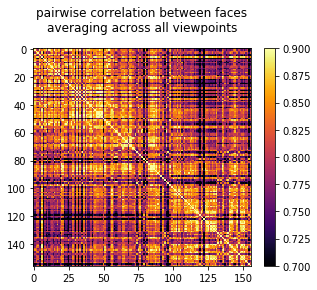

In [272]:
patterns = model_responses['trained']

race_grouping = np.array( ['id%s'%i for i in race_grouped_ids] ) 
object_responses = [np.mean([patterns[i] for i in stimulus_files if (I in i)], 0) for I in race_grouping] 
#view_responses = [patterns[i] for i in stimulus_files if i_view in i]


RDM = plt.imshow( np.corrcoef( object_responses ), cmap='inferno', clim=[.7,.9]) ; 
#plt.yticks(range(len(objects)), objects);  
plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM,fraction=0.046, pad=0.04)
#plt.xticks(range(len(objects)), objects, rotation=90);  
plt.title('pairwise correlation between faces\naveraging across all viewpoints', y=1.05)

In [37]:
metadata.race_guess

array(['b', 'w', 'i', 'u'], dtype=object)

In [261]:
import pickle, pandas 
import os, numpy as np 
import torch 
import torchvision.models as models
import torch, torch.nn as nn
import cv2
import torch.nn.functional as F

In [262]:
import sys
base = '/Users/biota/working/faces/facetrained_model/pretrained/'
sys.path.append(base)
import vgg_face as face

In [263]:
face_model = face.VGG_16()#.double()

In [264]:
face_model = face.VGG_16()#.double()
face_model.load_weights('/Users/biota/working/faces/facetrained_model/pretrained/VGG_FACE.t7') 

In [265]:
filename = os.path.join(ipath, i_file)
input_image = Image.fromarray(np.array(Image.open(filename))[:,:,:3])
input_tensor = preprocess(input_image).unsqueeze(0)

In [6]:
face_model = face.VGG_16()#.double()
face_model.load_weights('/Users/biota/working/faces/facetrained_model/pretrained/VGG_FACE.t7') 
face_model = nn.Sequential(*list(face_model.children())[:-3])

facemodel_responses = {} 

for i_file in stimulus_files: 

    print( i_file, end='.')

    filename = os.path.join(ipath, i_file)
    input_image = Image.fromarray(np.array(Image.open(filename))[:,:,:3])
    input_tensor = preprocess(input_image).unsqueeze(0)

    with torch.no_grad():
        facemodel_responses[i_file] = np.array(model(input_tensor).detach().flatten())

Text(0.5, 1.05, 'pairwise correlation between faces\naveraging across all viewpoints')

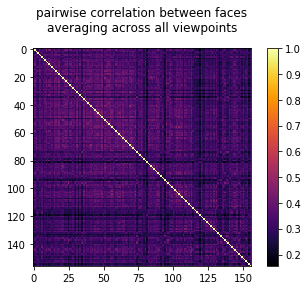

In [279]:
patterns = facemodel_responses

race_grouping = np.array( ['id%s'%i for i in race_grouped_ids] ) 
object_responses = [np.mean([patterns[i] for i in stimulus_files if (I in i)*('00C_C' in i)], 0) for I in race_grouping] 
#view_responses = [patterns[i] for i in stimulus_files if i_view in i]


RDM = plt.imshow( np.corrcoef( object_responses ), cmap='inferno') ; 
#plt.yticks(range(len(objects)), objects);  
#plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM) #,fraction=0.046, pad=0.04)
#plt.xticks(range(len(objects)), objects, rotation=90);  
plt.title('pairwise correlation between faces\naveraging across all viewpoints', y=1.05)

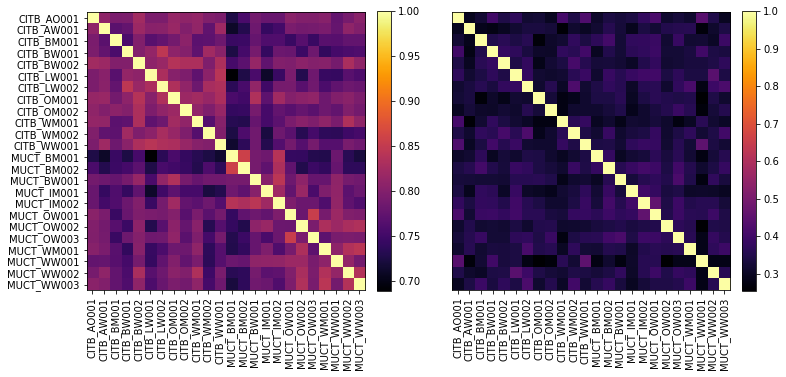

In [45]:
objects = np.unique( [i[:10] for i in patterns] ) 


plt.figure(figsize=[12,6])


plt.subplot(121)

object_responses = [np.mean([patterns[i] for i in stimulus_files if I in i], 0) for I in np.sort(objects)] 

RDM = plt.imshow( np.corrcoef( object_responses ), cmap='inferno') ; 
plt.yticks(range(len(objects)), objects);  
plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM,fraction=0.046, pad=0.04)
plt.xticks(range(len(objects)), objects, rotation=90);  


plt.subplot(122)

i_view = '00C_00C'
view_responses = [patterns[i] for i in stimulus_files if i_view in i]


RDM = plt.imshow( np.corrcoef( view_responses ), cmap='inferno') ; 
plt.yticks([]);  
plt.plt.ylim(len(objects)-.5, -.5)
plt.colorbar(RDM,fraction=0.046, pad=0.04)
plt.xticks(range(len(objects)), objects, rotation=90);  

In [12]:
#cat /Users/biota/working/perirhinal_function/stimuli/scripts/test_rotation/stimulus_information.json